In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

# Projections in R^2

0.8
[1.6 0.8]


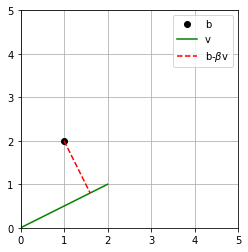

In [2]:
# creating point b (vector b)
b = np.array([1, 2])

# create a line or vector subspace
v = np.array([2, 1])

# beta or lambda
# beta = (v.T@b) / (v.T@v)
beta = (np.dot(v, b)) / (np.dot(v, v))             # another way to code beta
print(beta)

# projection of b on v
proj = beta*v                                      # here beta is a scalar
print(proj)

# draw
plt.plot(b[0],b[1],'ko',label='b')
plt.plot([0, v[0]],[0, v[1]],'g',label='v')

# now plot projection line
plt.plot([b[0], beta*v[0]],[b[1], beta*v[1]],'r--',label=r'b-$\beta$v')
plt.axis('square')
plt.grid()
plt.legend()
plt.axis((0, 5, 0, 5))

plt.show()

# Projections in R^N

In [3]:
## the goal here is to solve Ax=b for x

# sizes
m = 16
n = 10

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)

# solution using explicit inverse
x1 = np.linalg.inv(A.T@A) @ (A.T@b)

# python solution (better method)
x2 = np.linalg.solve(A.T@A,A.T@b)

# show that the results are the same
print(np.round(x1.T,3))
print(np.round(x2.T,3))

[[-0.566  0.844  0.681  0.424 -0.567  0.455 -0.029 -1.696  0.498  0.574]]
[[-0.566  0.844  0.681  0.424 -0.567  0.455 -0.029 -1.696  0.498  0.574]]


In [4]:
## geometric perspective in R^3

# matrix sizes
m = 3
n = 2

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)


# solution
x = np.linalg.solve(A.T@A,A.T@b)
Ax = A@x

print(b.T)
print(Ax.T)

[[-1.47043545  2.87718063  0.45807616]]
[[-0.92116473  3.05963214  0.21515389]]


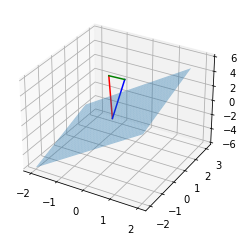

In [6]:
## plot
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(projection='3d')

# plot the vectors
ax.plot([0, b[0]],[0, b[1]],[0, b[2]],'r')
ax.plot([0, Ax[0]],[0, Ax[1]],[0, Ax[2]],'b')

# plot the projection line
ax.plot( [Ax[0][0], b[0]],
         [Ax[1][0], b[1]],
         [Ax[2][0], b[2]], 'g')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2,2), np.linspace(-2,2))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1,alpha=.4)

plt.show()

In [7]:
# creating point b (vector b)
b = np.array([1, 2])

# create a line or vector subspace
v = np.array([2, 1])

# beta or lambda
# beta = (v.T@b) / (v.T@v)
beta = (np.dot(v, b)) / (np.dot(v, v))             # another way to code beta
print(beta)

# projection of b on v
proj = beta*v                                      # here beta is a scalar
print(proj)

######################################################
# u = np.array([0.8944, 0.4472]) 
mu = 1/np.linalg.norm(v)
# Calculating unit vector of the given vector
u = v*mu
print(u)
A = np.array([[u[0]**2, u[0]*u[1]], [u[1]*u[0], u[1]**2]])
print()
print(A)

proj1 = A@b
print()
print(proj1)

0.8
[1.6 0.8]
[0.89442719 0.4472136 ]

[[0.8 0.4]
 [0.4 0.2]]

[1.6 0.8]


In [8]:
# Code practice 1: decomposing vector to orthogonal compomemts

# vector w (to be decomposed)
w = np.array([2, 3])

# vector v (reference vector)
v = np.array([4, 0])

# computing w-parallel-to-v
beta = np.dot(w, v)/ (np.dot(v, v))
wPV = beta*v

# computing w-orthogonal-to-v
wOV = w - wPV

# dot product of orthogonal component of w
print("dot product of orthogonal component of w: ", np.dot(wPV, wOV))

dot product of orthogonal component of w:  0.0


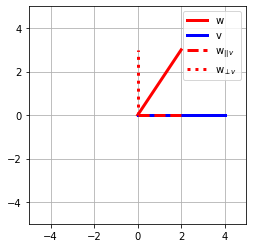

In [9]:
# plotting
plt.plot([0,w[0]],[0,w[1]],'r', linewidth=3)
plt.plot([0,v[0]],[0,v[1]],'b', linewidth=3)
plt.plot([0,wPV[0]],[0,wPV[1]],'r--', linewidth=3)
plt.plot([0,wOV[0]],[0,wOV[1]],'r:', linewidth=3)

plt.legend(['w','v','w$_{||v}$','w$_{\perp v}$'])
plt.axis('square')
plt.grid()
plt.axis([-5,5,-5,5])
plt.show()

# QR decomposition

In [10]:
A = [[1,0],
     [1,0],
     [0,1]]

# "full" QR decomposition
Q,R = np.linalg.qr(A,'complete')
print(Q)
print(' ')

# "economy" QR decomposition
Q,R = np.linalg.qr(A) # is the default option in Python
print(Q)

[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]
 
[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]


In [11]:
## second example

# the to-be-decomposed matrix
M = np.array( [ [1, 1,-2], [3,-1, 1] ] )

# QR decomposition
Q,R = np.linalg.qr(M,'complete')

# notice:
print('R from QR: '),print(np.round(R,4))
print('R from Q^TM: '),print(np.round(Q.T@M,4))

R from QR: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]
R from Q^TM: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]


(None, None)

[]

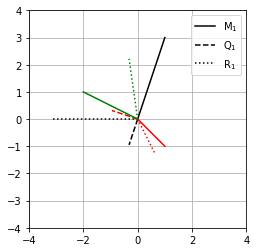

In [12]:
# plot
colorz = 'krg'

for i in range(0,np.shape(M)[1]):
    
    # plot original vector M
    plt.plot([0,M[0,i]],[0,M[1,i]],colorz[i])
    
    # plot orthogonalized vector Q
    if i<np.shape(Q)[1]:
        plt.plot([0,Q[0,i]],[0,Q[1,i]],colorz[i],linestyle='--')
    
    # plot residual vector R
    plt.plot([0,R[0,i]],[0,R[1,i]],colorz[i],linestyle=':')

    
plt.legend(['M$_1$','Q$_1$','R$_1$'])
plt.axis('square')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.plot()

In [13]:
# Code Practice 2: Gram schmidit algorithm

# Implimenting G-M procedure in code
# creat square matrix, and compute Q(orthogonal matrix)

m = 4
n = 4
A = np.random.randn(m,n)
Q = np.zeros((m,n))
Q1 = Q
# looping over columns
for i in range(n):
    Q[:,i] = A[:,i]
    a = A[:,i]
    
    # step 1: orthogonalize the ith column in Q, relative to previous column in A
    for j in range(i):
        q = Q[:,j]
        Q[:,i] = Q[:,i] - np.dot(a,q)/np.dot(q,q) * q
        
    # step 2: normalize ith column of Q
    Q[:,i] = Q[:, i] / np.linalg.norm(Q[:,i])
    
print(Q)

[[-0.15438594 -0.83842697  0.05880738  0.51937163]
 [-0.28552183  0.36179322  0.7870419   0.41005854]
 [-0.9279844   0.10579477 -0.35126877 -0.0652892 ]
 [-0.18299516 -0.39364114  0.50370328 -0.7468885 ]]


[[ 1. -0. -0.  0.]
 [-0.  1.  0. -0.]
 [-0.  0.  1. -0.]
 [ 0. -0. -0.  1.]]


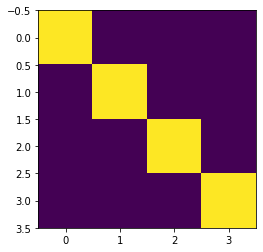

In [14]:
# check 1:
print(np.round(Q.T@Q,3))
plt.imshow(Q.T@Q)
plt.show()

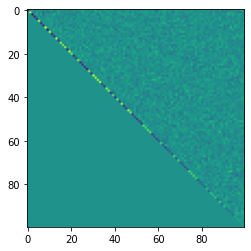

In [15]:
# Code Practice 3: Inverse of matrix via QR decomposition
# generating a large square matrix
n = 100
A = np.random.randn(n,n)

# explicit inverse
Ai = np.linalg.inv(A)

# inverse via QR
Q,R = np.linalg.qr(A)
plt.imshow(R)
plt.show()

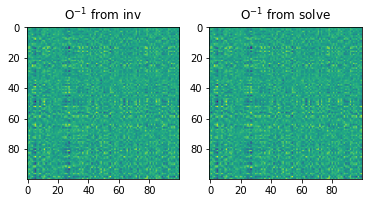

In [16]:
AiQR1 = np.linalg.inv(R)@Q.T
AiQR2 = np.linalg.solve(R, Q.T)

plt.subplot(1, 2, 1)
plt.imshow(AiQR1)
plt.title('O$^{-1}$ from inv')

plt.subplot(1, 2, 2)
plt.imshow(AiQR2)
plt.title('O$^{-1}$ from solve')

plt.show()

In [17]:
# vectorizing the matrices and checking the corelation b/w them i.e., all three are inverse if A
np.corrcoef((AiQR1.flatten(), AiQR2.flatten(), Ai.flatten()))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [18]:
# Code Practice 4: Prove and Demonstration of Sherman-Morrison inverse
m = 5;
a = np.random.randn(m)
b = np.random.randn(m)

# computing a matrix A of size mxm (a*b' is outer product of vector a and b)
A = np.eye(m) - np.outer(a,b)
Ai = np.eye(m) + np.outer(a,b) / (1-np.dot(a,b))

print("A x A_inverse = \n", np.round(A@Ai, 3))

A x A_inverse = 
 [[ 1. -0. -0. -0.  0.]
 [-0.  1. -0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [-0. -0.  0.  1.  0.]
 [ 0.  0. -0.  0.  1.]]


In [19]:
# failure condition on sherman morrison inverse formula
a = a/np.linalg.norm(a)
b = a

A = np.eye(m) - np.outer(a,b)
Ai = np.eye(m) + np.outer(a,b) / (1-np.dot(a,b))

print("A x A_inverse = \n", np.round(A@Ai, 3))

A x A_inverse = 
 [[ 0.985  0.027 -0.006 -0.008  0.006]
 [ 0.027  0.959  0.019  0.107  0.01 ]
 [ 0.057 -0.044  0.73   0.096 -0.034]
 [-0.047  0.132  0.268  0.724  0.018]
 [ 0.01  -0.014 -0.029  0.016  0.994]]


In [20]:
# Code Practice 5: A'A = R'R

# show that A'A == R'R  (R from QR)
# generating random matrix A
m = 10
n = 5
A = np.random.randn(m,n)

# computing QR decomposition
Q, R = np.linalg.qr(A)

# testing the claim
print(np.round(A.T@A - R.T@R, 4))

[[-0.  0. -0.  0. -0.]
 [ 0. -0.  0.  0.  0.]
 [-0.  0.  0.  0.  0.]
 [ 0.  0.  0. -0.  0.]
 [-0.  0.  0.  0.  0.]]
